In [47]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime

pd.options.display.max_columns = None

In [48]:
path = './project_input/activities_with_zones.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0.1,Unnamed: 0,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,start_date,start_date_local,timezone,utc_offset,location_city,location_state,location_country,achievement_count,kudos_count,comment_count,athlete_count,photo_count,map,trainer,commute,manual,private,visibility,flagged,gear_id,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_temp,average_watts,max_watts,weighted_average_watts,kilojoules,device_watts,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,suffer_score,HR Zone 1,HR Zone 2,HR Zone 3,HR Zone 4,HR Zone 5,Power Zone 1,Power Zone 2,Power Zone 3,Power Zone 4,Power Zone 5,Power Zone 6,Power Zone 7,Power Zone 8,Power Zone 9,Power Zone 10,Power Zone 11
0,0,0,2,"{'id': 3506416, 'resource_state': 1}","Feel the fatigue, need rest",63539.8,8189,8382,131.0,Ride,Ride,10.0,10057164887,2023-10-17T17:00:06Z,2023-10-17T10:00:06Z,(GMT-07:00) America/Phoenix,-25200.0,NaN,NaN,United States,10,17,0,1,0,"{'id': 'a10057164887', 'summary_polyline': 'qe...",False,False,False,False,everyone,False,b12532853,"[33.419589484110475, -111.92323436960578]","[33.41942980885506, -111.92315675318241]",7.759,13.210,88.4,32.0,155.9,723.0,174.0,1276.9,True,True,152.1,187.0,False,True,361.2,316.8,1.077488e+10,1.077488e+10,garmin_ping_300060328822,False,2,1,False,176.0,125.0,4257.0,2782.0,1025.0,0.0,618.0,127.0,738.0,1868.0,3179.0,951.0,564.0,88.0,29.0,7.0,20.0
1,1,1,2,"{'id': 3506416, 'resource_state': 1}",Congregation,65466.1,8033,9545,276.0,Ride,Ride,10.0,10044558487,2023-10-15T13:22:30Z,2023-10-15T06:22:30Z,(GMT-07:00) America/Phoenix,-25200.0,NaN,NaN,United States,19,46,0,31,0,"{'id': 'a10044558487', 'summary_polyline': 'eg...",False,False,False,False,everyone,False,b12532853,"[33.41984865255654, -111.92403031513095]","[33.41946383938193, -111.92317427136004]",8.150,16.662,92.1,17.0,149.1,846.0,188.0,1197.3,True,True,144.8,187.0,False,True,348.6,238.6,1.076175e+10,1.076175e+10,garmin_ping_299698521677,False,2,0,False,117.0,146.0,5628.0,1349.0,910.0,0.0,1972.0,291.0,838.0,1426.0,1427.0,639.0,382.0,299.0,282.0,177.0,300.0
2,2,2,2,"{'id': 3506416, 'resource_state': 1}",Morning Ride,24439.8,4925,4972,58.0,Ride,Ride,NaN,10038133180,2023-10-14T15:00:20Z,2023-10-14T08:00:20Z,(GMT-07:00) America/Phoenix,-25200.0,NaN,NaN,United States,0,18,0,1,0,"{'id': 'a10038133180', 'summary_polyline': 'co...",False,False,False,False,everyone,False,b12532853,"[33.42600733973086, -111.99600865133107]","[33.41948269866407, -111.92322045564651]",4.962,15.398,67.0,21.0,73.6,1068.0,172.0,362.5,True,True,128.2,171.0,False,True,307.2,275.4,1.075504e+10,1.075504e+10,garmin_ping_299536152537,False,0,0,False,28.0,579.0,3980.0,361.0,5.0,0.0,1101.0,1573.0,1520.0,463.0,74.0,23.0,6.0,8.0,4.0,4.0,149.0
3,3,3,2,"{'id': 3506416, 'resource_state': 1}",Morning Ride,8939.8,1432,1628,6.0,Ride,Ride,NaN,10038132445,2023-10-14T14:31:51Z,2023-10-14T07:31:51Z,(GMT-07:00) America/Phoenix,-25200.0,NaN,NaN,United States,0,14,0,1,0,"{'id': 'a10038132445', 'summary_polyline': 'af...",False,False,False,False,everyone,False,b12532853,"[33.419796684756875, -111.92354500293732]","[33.42655660584569, -111.9916673284024]",6.243,14.912,78.8,17.0,75.0,1013.0,145.0,107.4,True,True,112.2,161.0,False,True,423.6,367.6,1.075504e+10,1.075504e+10,garmin_ping_299536136533,False,0,0,False,4.0,1078.0,337.0,17.0,0.0,0.0,325.0,221.0,615.0,179.0,34.0,17.0,11.0,4.0,5.0,1.0,20.0
4,4,4,2,"{'id': 3506416, 'resource_state': 1}",Ahwatukee + extra miles,104175.0,13563,15833,331.0,Ride,Ride,10.0,10032329923,2023-10-13T13:24:08Z,2023-10-13T06:24:08Z,(GMT-07:00) America/Phoenix,-25200.0,NaN,NaN,United States,48,32,0,1,0,"{'id': 'a10032329923', 'summary_polyline': 'of...",False,False,False,False,everyone,False,b12532853,"[33.419574815779924, -111.92323244176805]","[33.4194032382

In [49]:
dist_df = df[['start_date_local', 'distance']]
dist_df.head()

,start_date_local,distance
0,2023-10-17T10:00:06Z,63539.8
1,2023-10-15T06:22:30Z,65466.1
2,2023-10-14T08:00:20Z,24439.8
3,2023-10-14T07:31:51Z,8939.8
4,2023-10-13T06:24:08Z,104175.0


In [50]:
dist_df.columns = ['date', 'distance']
dist_df.head()
form_dist_df = pd.DataFrame({'date': [], 'distance': []})

In [56]:
form_dist_df['date'] = pd.to_datetime(dist_df['date'])
form_dist_df['date'].iloc[0]

Timestamp('2023-10-17 10:00:06+0000', tz='UTC')

In [54]:
form_dist_df['distance'] = dist_df['distance'].apply(lambda x : x / 1000)
form_dist_df['distance'].iloc[0]

63.5398

In [57]:
form_dist_df.head()

,date,distance
0,2023-10-17 10:00:06+00:00,63.5398
1,2023-10-15 06:22:30+00:00,65.4661
2,2023-10-14 08:00:20+00:00,24.4398
3,2023-10-14 07:31:51+00:00,8.9398
4,2023-10-13 06:24:08+00:00,104.1750


In [58]:
form_dist_df.tail()

,date,distance
1596,2013-12-26 06:11:59+00:00,21.3606
1597,2013-12-24 06:13:50+00:00,24.1063
1598,2013-12-23 06:31:14+00:00,22.4779
1599,2013-12-20 06:22:37+00:00,18.1138
1600,2013-12-18 06:12:13+00:00,18.7978


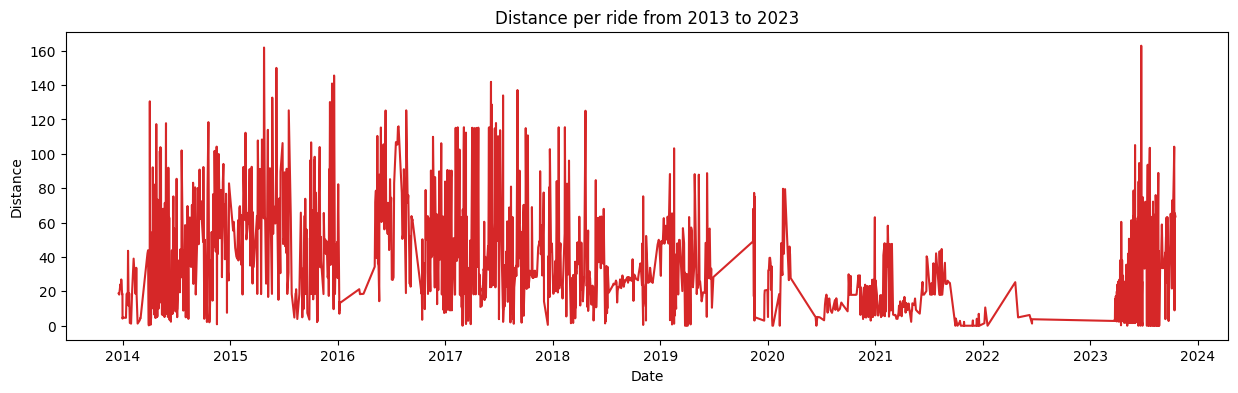

In [64]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(form_dist_df['date'], form_dist_df['distance'], color='tab:red')
plt.gca().set(title='Distance per ride from 2013 to 2023', xlabel='Date', ylabel='Distance')
plt.show()

In [65]:
df_2023 = form_dist_df[form_dist_df['date'].dt.year == 2023]
df_2023.describe()

,distance
count,269.000000
mean,21.654620
std,28.089699
min,0.000000
25%,2.316100
50%,3.347200
75%,38.121900
max,162.929000


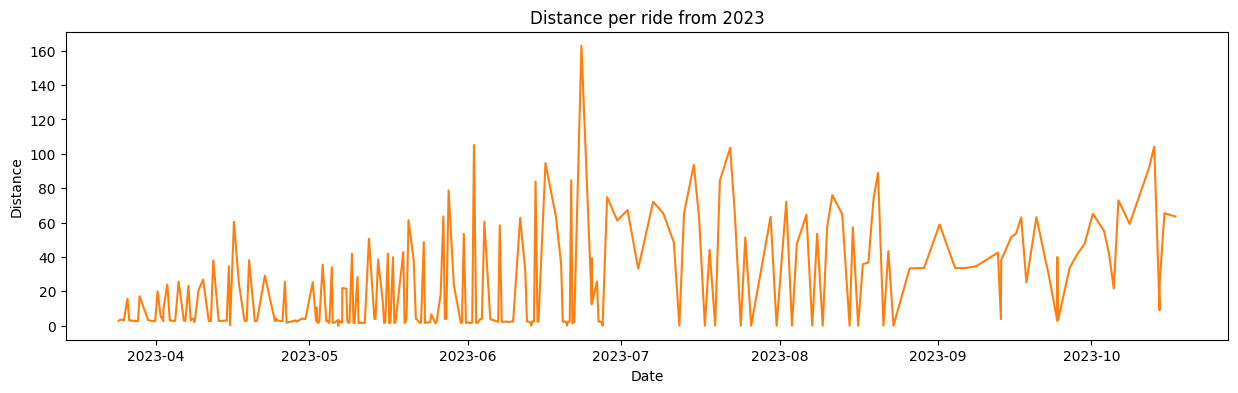

In [67]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(df_2023['date'], df_2023['distance'], color='tab:orange')
plt.gca().set(title='Distance per ride from 2023', xlabel='Date', ylabel='Distance')
plt.show()